### Visualizador de soluciones GRASP

['Evaluacion:', '223.325']


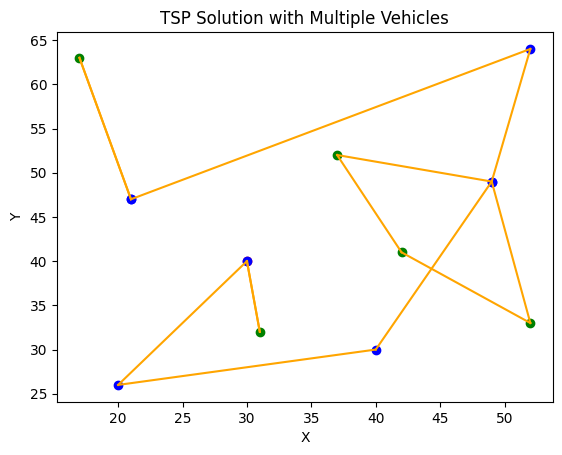

In [2]:
import matplotlib.pyplot as plt

def plot_tsp_solution(solutions,eval):
    # Plot nodes and edges for each vehicle
    print(eval)
    colors = ["orange","red","green","violet","purple"]
    for index,solution in enumerate(solutions):
        x = [node[0] for node in solution]
        y = [node[1] for node in solution]
        is_customers = [node[2] for node in solution]
        depot = (x[0],y[0])
        x = x[1:]
        y = y[1:]
        is_customers = is_customers[1:]

        normal_clients_x = [x[i] for i in range(len(x)) if is_customers[i] == 0]
        normal_clients_y = [y[i] for i in range(len(y)) if is_customers[i] == 0]
        truck_clients_x = [x[i] for i in range(len(x)) if is_customers[i] == 1]
        truck_clients_y = [y[i] for i in range(len(y)) if is_customers[i] == 1]
        
        plt.scatter(depot[0], depot[1], color="red") #Aqui depot
        plt.scatter(normal_clients_x, normal_clients_y, color="blue") #Aqui clientes normales
        plt.scatter(truck_clients_x, truck_clients_y, color="green") #Aqui clientes de camion

        for i in range(len(solution) - 1):
            plt.plot([solution[i][0], solution[i+1][0]], [solution[i][1], solution[i+1][1]], color=colors[index])

    plt.title('TSP Solution with Multiple Vehicles')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

solutions = list()
file = open("solution.txt","r")
for line in file:
    solution = list()
    line = line.strip().split(" ")
    if "E" in line[0]:
        eval = line
        continue
    for pair in line:
        is_customer = 0
        pair = pair.split(",")
        x = pair[0]
        y = pair[1]
        if "T" in x:
            is_customer = 1
            x = x.removeprefix("T")
        solution.append((int(x),int(y),is_customer))
    solutions.append(solution)

# Plot the TSP solution with multiple vehicles
plot_tsp_solution(solutions,eval)
